### Test case LVV-T49: Verify implementation of DIASource Catalog

Verify that the DMS produces a Source catalog from Difference Exposures with the required attributes.

**DMS-REQ-0269** Specification: The DMS shall construct a catalog of all Sources detected on Difference Exposures with SNR>transSNR(=5). For each Difference Source (DIASource), the DMS shall be able to provide the identity of the Difference Exposure from which it was derived; the identity of the associated SSObject, if any; the identity of the parent Source from which this DIASource has been deblended, if any. The DMS shall also measure and record a set of attributes for each DIASource including at least: epoch of the observation, focal plane position centroid and error (pixel), sky position and associated error (radec), SNR of the detection; calibrated PS flux and associated error; likelihood of the observed data given the PS model; calibrated aperture flux and associated error; calibrated flux and associated error for a trailed source model, and length and angle of the trail; flux and associated parameters for a dipole model; parameters of an adaptive shape measurement and associated error; a measure of source extendedness; the estimated background at the position of the object in the template image with associated uncertainty; a measure of spuriousness; and flags indicating problems encountered while computing the aforementioned attributes. The DMS shall also determine and record measurements on the Calibrated exposure the following: calibrated flux and associated error for the source as measured on the Visit image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lsst.daf.butler import Butler

In [2]:
butler = Butler('dp2_prep', collections=['LSSTCam/runs/DRP/20250417_20250921/w_2025_49/DM-53545'])

#### Retrieve a `dia_source` catalog in each of the ugrizy bands:

Select a single `dia_source` catalog in each band. Specify only a band, and limit the query results to return only one dataset reference.

In [3]:
source_refs_dict = {}
bands_list = ['u', 'g', 'r', 'i', 'z', 'y']
for band in bands_list:
    source_refs_dict[band] = butler.query_datasets('dia_source', band=band,
                                                   skymap='lsst_cells_v2', limit=1)

In [4]:
source_refs_dict

{'u': [DatasetRef(DatasetType('dia_source', {skymap, tract}, DataFrame), {skymap: 'lsst_cells_v2', tract: 2078}, run='LSSTCam/runs/DRP/20250417_20250921/w_2025_49/DM-53545/20251214T235510Z', id=019b1f9f-82b7-722a-a76a-35ab8cd5e843)],
 'g': [DatasetRef(DatasetType('dia_source', {skymap, tract}, DataFrame), {skymap: 'lsst_cells_v2', tract: 2078}, run='LSSTCam/runs/DRP/20250417_20250921/w_2025_49/DM-53545/20251214T235510Z', id=019b1f9f-82b7-722a-a76a-35ab8cd5e843)],
 'r': [DatasetRef(DatasetType('dia_source', {skymap, tract}, DataFrame), {skymap: 'lsst_cells_v2', tract: 2078}, run='LSSTCam/runs/DRP/20250417_20250921/w_2025_49/DM-53545/20251214T235510Z', id=019b1f9f-82b7-722a-a76a-35ab8cd5e843)],
 'i': [DatasetRef(DatasetType('dia_source', {skymap, tract}, DataFrame), {skymap: 'lsst_cells_v2', tract: 2078}, run='LSSTCam/runs/DRP/20250417_20250921/w_2025_49/DM-53545/20251214T235510Z', id=019b1f9f-82b7-722a-a76a-35ab8cd5e843)],
 'z': [DatasetRef(DatasetType('dia_source', {skymap, tract}, Dat

In [5]:
src_i = butler.get(source_refs_dict['i'][0])

#### Examine the columns in the Source catalog

Print the column names in the i-band source catalog retrieved in the previous cell. These include positions (both focal plane and World coordinates), fluxes, shapes (moments), and their errors, along with various quality flags and calibration quantities.

In [7]:
src_i.columns

Index(['visit', 'detector', 'diaObjectId', 'ssObjectId', 'parentDiaSourceId',
       'midpointMjdTai', 'coord_dec', 'coord_ra', 'ra', 'dec', 'raErr',
       'decErr', 'ra_dec_Cov', 'x', 'xErr', 'y', 'yErr', 'centroid_flag',
       'apFlux', 'apFluxErr', 'apFlux_flag', 'apFlux_flag_apertureTruncated',
       'isNegative', 'snr', 'psfFlux', 'psfFluxErr', 'psfChi2', 'psfNdata',
       'psfFlux_flag', 'psfFlux_flag_edge', 'psfFlux_flag_noGoodPixels',
       'trailFlux', 'trailFluxErr', 'trailRa', 'trailDec', 'trailLength',
       'trailAngle', 'trail_flag_edge', 'dipoleMeanFlux', 'dipoleMeanFluxErr',
       'dipoleFluxDiff', 'dipoleFluxDiffErr', 'dipoleLength', 'dipoleAngle',
       'dipoleChi2', 'dipoleNdata', 'scienceFlux', 'scienceFluxErr',
       'forced_PsfFlux_flag', 'forced_PsfFlux_flag_edge',
       'forced_PsfFlux_flag_noGoodPixels', 'templateFlux', 'templateFluxErr',
       'ixx', 'iyy', 'ixy', 'ixxPSF', 'iyyPSF', 'ixyPSF', 'shape_flag',
       'shape_flag_no_pixels', 'shape_flag

#### Exposure information

Print the visit and detector information for 5 randomly-selected points from the i-band `dia_source` catalog.

Note that because the `dia_source` catalog is combined per _tract_, the `dia_source`s can be on different visit/detector combinations.

In [20]:
nsamples = 5

src_i[['visit', 'detector']].sample(n = nsamples)

,visit,detector
diaSourceId,,
25139294079811624,2025082600448,177
24985367207215293,2025072200484,31
25082104815550629,2025081300339,120
24972185012535990,2025071900573,30
24985367207215206,2025072200484,31


#### Associated SSObject, if any, and identity of the parent Source from which this DIASource has been deblended, if any

In [34]:
src_i[['ssObjectId', 'parentDiaSourceId']].sample(n = nsamples)

,ssObjectId,parentDiaSourceId
diaSourceId,,
24985367072473570,0,0
25077693102424188,0,0
24972184744100525,0,0
24972185014108218,0,0
24972184878318141,0,0


Note that in this case the `ssObjectId` and `parentDiaSourceId` values are all empty, indicating there were none for these sources.

#### Epoch of the observation

In [35]:
src_i['midpointMjdTai'].sample(n = nsamples)

diaSourceId
25139294210359360    60914.289896
24972184879890476    60876.312552
25082104681332936    60901.329200
24967773143695390    60875.363127
24972185012535829    60876.312989
Name: midpointMjdTai, dtype: float64

#### Focal plane positions and their errors, plus moments:

Shapes and sizes of resolved sources can be derived from the moments ixx, iyy, and ixy.

In [36]:
src_i[['x', 'xErr', 'y', 'yErr', 'ixx', 'ixy', 'iyy']].sample(n = nsamples)

,x,xErr,y,yErr,ixx,ixy,iyy
diaSourceId,,,,,,,
25077692836086010,1800.612129,1.543533,654.739203,1.133469,NaN,NaN,NaN
24972184879890444,2249.095643,0.052266,529.250521,0.052775,0.088099,0.064739,0.122114
24967772875260267,543.250363,0.494428,1269.965812,0.769547,0.411762,-0.146105,0.665713
25082104815550704,1972.954056,0.124955,3304.987876,0.449161,NaN,NaN,NaN
24985365730820265,2070.468325,0.510799,1761.301087,1.035275,0.110745,0.044672,0.209288


#### Plot the positions in focal plane and world coordinates

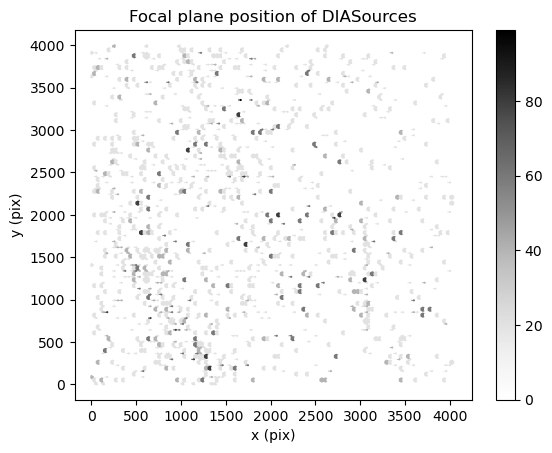

In [39]:
plt.hexbin(src_i['x'], src_i['y'], bins=100, cmap='Grays')
plt.colorbar()
plt.title('Focal plane position of DIASources')
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.show()

#### Positions in World coordinates

In [40]:
src_i[['ra', 'raErr', 'dec', 'decErr']].sample(n = nsamples)

,ra,raErr,dec,decErr
diaSourceId,,,,
24972185014108187,57.071852,0.000001,-50.762593,0.000002
24967773009477788,57.164106,0.000023,-50.664162,0.000061
25082104815550624,56.990033,0.000018,-50.596727,0.000027
24972185014108316,57.249967,0.000007,-50.650948,0.000012
24972184879890459,57.154354,0.000012,-50.700824,0.000010


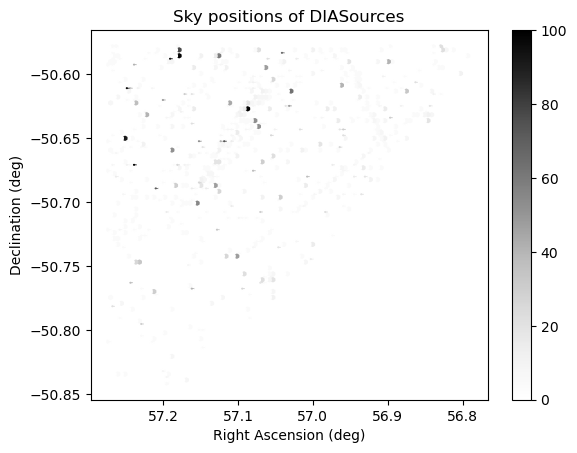

In [43]:
plt.hexbin(src_i['ra'], src_i['dec'], bins=100, cmap='Grays', vmax=100)
plt.colorbar()
plt.title('Sky positions of DIASources')
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.gca().invert_xaxis()
plt.show()

#### Flux measurements

There are many flux measurements in the `dia_source` catalogs. The following will list all column names with "Flux" in them. We see that there are aperture fluxes, PSF fluxes, trailed-source fluxes, and dipole fluxes, along with their associated errors and quality flags. In addition, the flux on the `visit` image (`scienceFlux`) and on the template (`templateFlux`) are also reported. All fluxes have been calibrated to nanoJanskys.

In [48]:
for col in src_i.columns:
    if 'Flux' in col:
        print(col)

apFlux
apFluxErr
apFlux_flag
apFlux_flag_apertureTruncated
psfFlux
psfFluxErr
psfFlux_flag
psfFlux_flag_edge
psfFlux_flag_noGoodPixels
trailFlux
trailFluxErr
dipoleMeanFlux
dipoleMeanFluxErr
dipoleFluxDiff
dipoleFluxDiffErr
scienceFlux
scienceFluxErr
forced_PsfFlux_flag
forced_PsfFlux_flag_edge
forced_PsfFlux_flag_noGoodPixels
templateFlux
templateFluxErr


In [49]:
src_i[['apFlux', 'apFluxErr', 'psfFlux',
       'trailFlux', 'dipoleFluxDiff', 'scienceFlux', 'templateFlux']].sample(n=nsamples)

,apFlux,apFluxErr,psfFlux,trailFlux,dipoleFluxDiff,scienceFlux,templateFlux
diaSourceId,,,,,,,
25077693102424234,-1333.436646,1203.358154,1410.131592,NaN,0.0,241835.343750,240052.140625
24972184879890540,-1876.942383,834.216309,-2589.371338,-3807.454834,NaN,71824.164062,74427.757812
25139293941924041,23.479254,804.702637,8328.403320,7656.275391,0.0,230691.484375,222405.609375
24972184879890439,-852.979065,865.061401,-1920.276489,-6042.326660,0.0,115369.156250,117399.812500
24972185012535922,7154.062012,799.459412,2931.107910,NaN,NaN,2529.094727,-496.414948


#### Compare the 9-pixel aperture and PSF fluxes for all sources

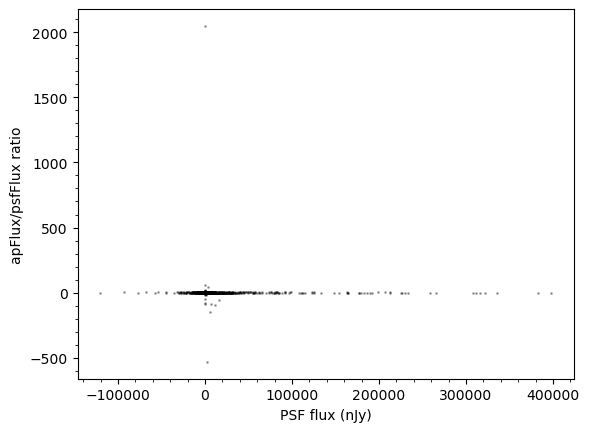

In [52]:
plt.plot(src_i['psfFlux'], src_i['apFlux']/src_i['psfFlux'], 'k.', ms=2, alpha=0.3)
plt.minorticks_on()
plt.xlabel('PSF flux (nJy)')
plt.ylabel('apFlux/psfFlux ratio')
plt.show()

#### measures of source extendedness and spuriousness

In [54]:
src_i[['extendedness', 'reliability']].sample(n=nsamples)

,extendedness,reliability
diaSourceId,,
25051319295279120,0.994978,2.182769e-05
25077692970303739,NaN,6.593270e-04
25077693102424117,NaN,2.792508e-21
24985365730820207,NaN,4.037853e-01
24972185012536287,0.996618,2.437003e-05


## Results

We have demonstrated that the DIASource catalogs produced by the Science Pipelines contain all of the required attributes. Thus, we deem the result of this test a **Pass**.